In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\Python Scripts\courses-main\machine learning\BADS_WS2021_known.csv')

In [29]:
df

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0
99998,99999,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0


### EDA

In [160]:
df.head(5)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [161]:
df.tail(5)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.9,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.9,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.9,47794,Mr,1985-03-01,Hamburg,2016-09-10,0
99998,99999,2016-09-11,1994-12-31,1832,xxl,black,37,26.9,47794,Mr,1985-03-01,Hamburg,2016-09-10,0
99999,100000,2016-09-11,2016-10-08,1891,28,fuchsia,47,27.9,2622,Mrs,1973-10-17,Lower Saxony,2015-02-17,0


In [162]:
df.sample(10)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
46528,46529,2016-07-31,2016-08-02,1713,42,red,38,149.9,38544,Mrs,1946-11-29,Lower Saxony,2016-08-01,1
15926,15927,2016-06-29,2016-07-03,462,40,ocher,1,44.9,33502,Mrs,1951-10-23,Baden-Wuerttemberg,2015-02-17,0
79850,79851,2016-08-24,2016-08-27,1747,39,black,1,144.9,13860,Mrs,1973-01-21,Lower Saxony,2015-02-17,0
10272,10273,2016-06-27,2016-06-29,244,42,nature,61,29.9,32263,Mrs,1960-07-26,North Rhine-Westphalia,2015-02-17,1
45624,45625,2016-07-29,2016-07-31,105,42,brown,45,69.9,36722,Mrs,1900-11-21,Lower Saxony,2015-05-05,1
86559,86560,2016-08-29,2016-11-16,2028,44,olive,38,139.9,24134,Mrs,NaT,Lower Saxony,2015-02-17,1
72704,72705,2016-08-17,NaT,1690,s,black,90,149.9,43376,Mrs,1958-07-04,Bavaria,2016-08-18,0
13589,13590,2016-06-28,2016-07-18,311,40,purple,38,49.9,1342,Mrs,1962-10-07,Hesse,2016-01-12,0
61061,61062,2016-08-09,2016-08-13,1954,40,red,1,99.9,41329,Mrs,1984-05-05,Hesse,2016-08-10,1
97998,97999,2016-09-09,2016-09-11,1682,38,black,8,49.9,1467,Mrs,1961-12-07,North Rhine-Westphalia,2015-05-23,0


In [255]:
df.shape

(100000, 14)

In [256]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return'],
      dtype='object')

In [3]:
df.info()#Null values:'delivery_date' & 'user_dob'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_item_id  100000 non-null  int64  
 1   order_date     100000 non-null  object 
 2   delivery_date  90682 non-null   object 
 3   item_id        100000 non-null  int64  
 4   item_size      100000 non-null  object 
 5   item_color     100000 non-null  object 
 6   brand_id       100000 non-null  int64  
 7   item_price     100000 non-null  float64
 8   user_id        100000 non-null  int64  
 9   user_title     100000 non-null  object 
 10  user_dob       91275 non-null   object 
 11  user_state     100000 non-null  object 
 12  user_reg_date  100000 non-null  object 
 13  return         100000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.7+ MB


#### Change type of some colmuns

In [3]:
category_col = ['item_size', 'item_color','user_title', 'user_state']
df[category_col] = df[category_col].astype('category')

In [4]:
datetime_col = ['order_date', 'delivery_date','user_dob', 'user_reg_date']
df[datetime_col] = df[datetime_col].astype('datetime64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_item_id  100000 non-null  int64         
 1   order_date     100000 non-null  datetime64[ns]
 2   delivery_date  90682 non-null   datetime64[ns]
 3   item_id        100000 non-null  int64         
 4   item_size      100000 non-null  category      
 5   item_color     100000 non-null  category      
 6   brand_id       100000 non-null  int64         
 7   item_price     100000 non-null  float64       
 8   user_id        100000 non-null  int64         
 9   user_title     100000 non-null  category      
 10  user_dob       91275 non-null   datetime64[ns]
 11  user_state     100000 non-null  category      
 12  user_reg_date  100000 non-null  datetime64[ns]
 13  return         100000 non-null  int64         
dtypes: category(4), datetime64[ns](4), float64(1), int64(

In [261]:
df.dtypes

order_item_id             int64
order_date       datetime64[ns]
delivery_date    datetime64[ns]
item_id                   int64
item_size              category
item_color             category
brand_id                  int64
item_price              float64
user_id                   int64
user_title             category
user_dob         datetime64[ns]
user_state             category
user_reg_date    datetime64[ns]
return                    int64
dtype: object

In [14]:
df.isnull().sum()

order_date          0
delivery_date    9318
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         8725
user_state          0
user_reg_date       0
return              0
dtype: int64

In [15]:
df.nunique()

order_date          82
delivery_date      123
item_id           1943
item_size          102
item_color          77
brand_id           135
item_price         252
user_id          19205
user_title           5
user_dob          9247
user_state          16
user_reg_date      573
return               2
dtype: int64

In [16]:
df['item_price'].describe()

count    100000.000000
mean         65.064695
std          47.991546
min           0.000000
25%          29.900000
50%          49.900000
75%          79.900000
max         999.000000
Name: item_price, dtype: float64

In [17]:
np.sum(df['item_price'] == 0)#396 Free items 

396

In [110]:
(396/100000)*100#Free or not Free does not important

0.396

In [7]:
df[df['item_price'] == 0]

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
202,203,2016-06-23,2016-06-26,157,unsized,purple,32,0.0,12373,Mrs,1958-06-07,Lower Saxony,2015-02-26,0
216,217,2016-06-23,2016-06-26,157,unsized,purple,32,0.0,30852,Mrs,1969-03-30,Saxony,2015-06-21,1
218,219,2016-06-23,2016-06-27,157,unsized,purple,32,0.0,18671,Mrs,1955-11-05,North Rhine-Westphalia,2015-02-17,0
351,352,2016-06-23,2016-06-27,157,unsized,purple,32,0.0,12388,Mrs,1962-01-16,North Rhine-Westphalia,2015-11-01,0
352,353,2016-06-23,2016-06-27,157,unsized,purple,32,0.0,12388,Mrs,1962-01-16,North Rhine-Westphalia,2015-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96408,96409,2016-09-07,2016-10-29,1472,unsized,brown,60,0.0,47558,Mrs,1971-10-25,Schleswig-Holstein,2015-07-09,0
97231,97232,2016-09-08,2016-10-02,2025,unsized,grey,86,0.0,34189,Mrs,1963-09-08,Bavaria,2016-07-01,0
97433,97434,2016-09-08,2016-10-29,1472,unsized,brown,60,0.0,47745,Mrs,1951-07-13,Baden-Wuerttemberg,2015-11-23,0
98941,98942,2016-09-10,2016-10-29,1472,unsized,brown,60,0.0,7820,Mrs,1975-11-23,Hesse,2016-08-29,0


In [8]:
df[df['item_price'] == 0]['brand_id'].value_counts()#بررسی برندهایی که رایگان ارسال شده اند

32     160
60      81
5       58
126     31
111     22
125     13
86      11
136      7
67       6
42       3
137      2
121      1
110      1
Name: brand_id, dtype: int64

Text(0.5, 1.0, 'Number of brand order')

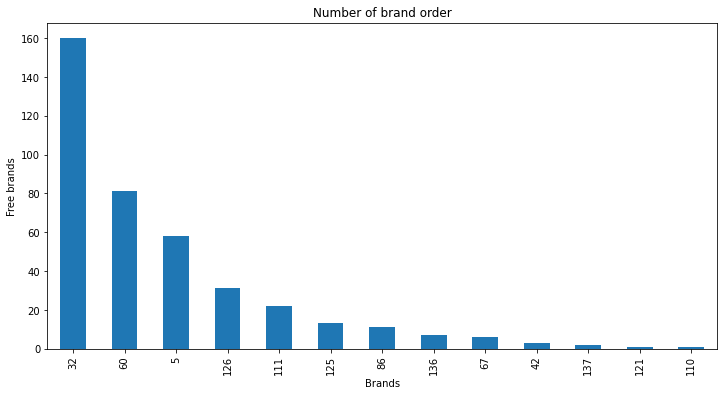

In [9]:
df[df['item_price'] == 0]['brand_id'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel('Free brands')
plt.xlabel('Brands')
plt.title('Number of brand order')

In [19]:
df[df['item_price'] == 0]['item_id'].value_counts()#بررسی محصولاتی که رایگان ارسال شده اند

157     160
1472     74
62       58
1436     22
1951     16
2121     15
1904     10
2025      9
2199      7
239       4
1014      3
807       3
2103      3
312       3
2221      3
553       2
2213      2
1725      1
1748      1
Name: item_id, dtype: int64

In [20]:
(df[df['item_price'] == 0])['return'].value_counts(normalize=True)*100

0    88.131313
1    11.868687
Name: return, dtype: float64

In [21]:
df['return'].value_counts(normalize=True)*100#Balanced Dataset

0    54.182
1    45.818
Name: return, dtype: float64

In [22]:
(df[df['item_price'] != 0])['return'].value_counts(normalize=True)*100

0    54.047026
1    45.952974
Name: return, dtype: float64

In [23]:
(df[df['item_price'] == 0])['user_state'].value_counts(normalize=True)*100

North Rhine-Westphalia           23.232323
Lower Saxony                     17.424242
Baden-Wuerttemberg               10.858586
Bavaria                          10.101010
Rhineland-Palatinate              6.818182
Hesse                             5.050505
Schleswig-Holstein                4.545455
Saxony                            4.040404
Brandenburg                       3.787879
Berlin                            3.282828
Thuringia                         3.030303
Bremen                            2.272727
Saxony-Anhalt                     1.767677
Hamburg                           1.515152
Mecklenburg-Western Pomerania     1.515152
Saarland                          0.757576
Name: user_state, dtype: float64

In [24]:
df[df['item_price'] == 0]['user_id'].value_counts().head()#مشتریانی که آیتم رایگان گرفته اند

35597    8
1867     6
22100    5
8180     4
32744    4
Name: user_id, dtype: int64

In [25]:
df[df['item_price'] == 0]['user_title'].value_counts().head()

Mrs             380
Mr                9
Family            5
not reported      2
Company           0
Name: user_title, dtype: int64

In [26]:
df['item_size'].value_counts()

l       12347
xl      10979
m       10190
xxl      8966
40       7693
        ...  
3834        1
12+         1
105         1
4034        1
3132        1
Name: item_size, Length: 102, dtype: int64

In [27]:
df[df['item_price'] == 0]['item_size'].value_counts()

unsized    395
40           1
1            0
42+          0
48           0
          ... 
29           0
28           0
27           0
26           0
xxxl         0
Name: item_size, Length: 102, dtype: int64

In [167]:
df[df['item_size'] == 'unsized']

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
24,25,2016-06-23,2016-06-26,40,unsized,stained,27,5.50,9392,Mrs,1962-04-14,North Rhine-Westphalia,2016-03-24,1
40,41,2016-06-23,2016-06-26,515,unsized,grey,32,9.90,30826,Mrs,1964-04-27,Baden-Wuerttemberg,2015-02-17,1
148,149,2016-06-23,2016-06-26,821,unsized,brown,60,49.90,18281,Mrs,1974-10-24,Rhineland-Palatinate,2016-05-11,0
202,203,2016-06-23,2016-06-26,157,unsized,purple,32,0.00,12373,Mrs,1958-06-07,Lower Saxony,2015-02-26,0
216,217,2016-06-23,2016-06-26,157,unsized,purple,32,0.00,30852,Mrs,1969-03-30,Saxony,2015-06-21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99957,99958,2016-09-11,2016-09-14,1649,unsized,blue,30,25.95,48234,Mrs,1962-10-02,Hesse,2016-09-12,1
99979,99980,2016-09-11,2016-09-12,1806,unsized,brown,110,16.90,48240,Mr,1971-07-22,North Rhine-Westphalia,2015-02-17,0
99987,99988,2016-09-11,2016-09-12,1668,unsized,purple,32,79.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,1
99988,99989,2016-09-11,2016-09-12,1509,unsized,petrol,32,39.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,0


In [29]:
df['item_size'].value_counts()

l       12347
xl      10979
m       10190
xxl      8966
40       7693
        ...  
3834        1
12+         1
105         1
4034        1
3132        1
Name: item_size, Length: 102, dtype: int64

In [30]:
df['user_state'].value_counts()

North Rhine-Westphalia           22825
Lower Saxony                     15149
Bavaria                          13672
Baden-Wuerttemberg               11981
Hesse                             7586
Schleswig-Holstein                5531
Rhineland-Palatinate              4784
Berlin                            4093
Saxony                            3147
Hamburg                           2535
Brandenburg                       2231
Mecklenburg-Western Pomerania     1640
Thuringia                         1550
Bremen                            1258
Saxony-Anhalt                     1122
Saarland                           896
Name: user_state, dtype: int64

In [31]:
df['user_title'].value_counts()

Mrs             95429
Mr               3915
Family            414
Company           128
not reported      114
Name: user_title, dtype: int64

In [32]:
df['item_color'].value_counts().head(50)

black         18640
blue          10625
brown          8734
grey           8708
red            7264
green          5565
purple         3925
petrol         3670
white          3256
anthracite     2741
ocher          2321
berry          2092
olive          2078
mocca          1959
denim          1851
stained        1483
ash            1411
aubergine      1174
pink           1025
dark denim      995
turquoise       939
orange          906
nature          818
beige           800
bordeaux        683
magenta         629
azure           456
aquamarine      404
khaki           388
pallid          358
basalt          350
yellow          333
navy            314
curry           309
ecru            265
coral           229
blau            226
ancient         195
hibiscus        171
mahagoni        165
mint            137
striped         134
silver          128
fuchsia         119
floral           96
cognac           87
darkblue         74
mango            74
?                61
ivory            53


In [37]:
df['brand_id'].value_counts().head(10)#10 برند پر فروش

3     11389
1      8381
5      5039
37     4716
11     4236
20     2828
6      2678
17     2579
38     2112
43     1927
Name: brand_id, dtype: int64

In [10]:
df['user_id'].nunique()#har user mitavad bish az yek sefaresh(satr) dashte bashad

19205

#### Grouping Data

In [262]:
dfG = df.groupby(['user_id','order_item_id'])
dfG.first()

order_date delivery_date  item_id item_size item_color  \
user_id order_item_id                                                          
9       47259         2016-08-01    2016-08-02     2081        40      black   
        47260         2016-08-01    2016-08-02     1922        40       grey   
        47261         2016-08-01    2016-08-24     1613        40    ancient   
        62930         2016-08-10    2016-08-14     1613        40      black   
        62931         2016-08-10    2016-08-14     2081        40      black   
...                          ...           ...      ...       ...        ...   
48240   99979         2016-09-11    2016-09-12     1607         l       grey   
        99980         2016-09-11    2016-09-12     1806   unsized      brown   
        99981         2016-09-11    2016-09-24     1412        40   bordeaux   
48241   99983         2016-09-11    2016-09-13     1768        39      black   
        99984         2016-09-11    2016-09-13     1613        39      black   

                       brand_id  item_price user_title   user_dob  \
user_id order_item_id                                               
9       47259                40       219.9        Mrs 1973-02-19   
        47260                26       159.9        Mrs 1973-02-19   
        47261                 1       199.9        Mrs 1973-02-19   
        62930                 1       199.9        Mrs 1973-02-19   
        62931                40       219.9        Mrs 1973-02-19   
...                         ...         ...        ...        ...   
48240   99979                29        59.9         Mr 1971-07-22   
        99980               110        16.9         Mr 1971-07-22   
        99981                54       119.9         Mr 1971-07-22   
48241   99983                 1       134.9        Mrs 1962-11-04   
        99984                 1       199.9        Mrs 1962-11-04   

                                   user_state user_reg_date  return  
user_id order_item_id                                                
9       47259            Rhineland-Palatinate    2016-03-02       1  
        47260            Rhineland-Palatinate    2016-03-02       1  
        47261            Rhineland-Palatinate    2016-03-02       1  
        62930            Rhineland-Palatinate    2016-03-02       0  
        62931            Rhineland-Palatinate    2016-03-02       1  
...                                       ...           ...     ...  
48240   99979          North Rhine-Westphalia    2015-02-17       1  
        99980          North Rhine-Westphalia    2015-02-17       0  
        99981          North Rhine-Westphalia    2015-02-17       0  
48241   99983                         Hamburg    2016-09-12       1  
        99984                         Hamburg    2016-09-12       1  

[100000 rows x 12 columns]

#### Pivot Tables

In [6]:
table = pd.pivot_table(df, values='return', index=['brand_id'],aggfunc=np.mean)
table.rename(columns = {'return':'mean_of_brand_return'}, inplace = True)
table

,mean_of_brand_return
brand_id,
1,0.489440
2,0.419664
3,0.366582
4,0.493763
5,0.391546
...,...
134,0.000000
135,0.000000
136,0.142857


In [7]:
table[table['mean_of_brand_return'] > 0.5]#برندهایی که در بیش از 50 درصد مواقع مرجوع شده اند

,mean_of_brand_return
brand_id,
9,0.530259
11,0.575071
16,0.570513
20,0.584866
21,0.531323
23,0.547993
25,0.611650
31,0.512948
35,0.547253


In [7]:
User_id2 = df['user_id'].value_counts()
User_id2

18912    175
5006     107
9366      97
36824     88
22100     87
        ... 
26773      1
25583      1
45508      1
29842      1
17222      1
Name: user_id, Length: 19205, dtype: int64

In [8]:
table2 = pd.pivot_table(df, values='return', index=['user_id'],aggfunc=np.mean)
table2#محاسبه میانگین مرجوعی هر مشتری

,return
user_id,
9,0.80
11,0.00
24,0.00
30,0.50
40,0.50
...,...
48237,0.90
48238,0.50
48239,0.50


In [9]:
df2=pd.concat([table2,User_id2],axis=1)
df2.rename(columns = {'user_id':'number_of_order','return' : 'Mean_of_user_return'}, inplace = True)
df2.sort_values('number_of_order',ascending=False)

,Mean_of_user_return,number_of_order
18912,0.320000,175
5006,0.271028,107
9366,0.371134,97
36824,0.397727,88
31185,0.540230,87
...,...,...
43000,0.000000,1
31978,0.000000,1
43003,0.000000,1
31954,0.000000,1


In [10]:
df2[df2['Mean_of_user_return'] == 0]['number_of_order'].value_counts()

1     2647
2     1590
3      792
4      461
5      233
6      164
7       89
8       66
9       40
10      32
11      21
12      11
13       9
14       7
15       7
19       4
22       4
17       4
18       3
16       2
23       2
21       1
31       1
Name: number_of_order, dtype: int64

In [11]:
df2[df2['Mean_of_user_return'] == 1]

,Mean_of_user_return,number_of_order
113,1.0,4
129,1.0,3
169,1.0,1
179,1.0,2
232,1.0,9
...,...,...
48230,1.0,1
48231,1.0,1
48233,1.0,1
48235,1.0,2


In [12]:
df2[df2['number_of_order'] > 1]['Mean_of_user_return'].mean()*100#افرادی که بیش از یکبار سفارش داده اند در 43% مواقع سفارش را مرجوغ کرده اند

43.75078349681849

In [13]:
df2.reset_index(inplace = True)
df2

,index,Mean_of_user_return,number_of_order
0,9,0.80,5
1,11,0.00,1
2,24,0.00,1
3,30,0.50,2
4,40,0.50,4
...,...,...,...
19200,48237,0.90,10
19201,48238,0.50,2
19202,48239,0.50,2
19203,48240,0.25,4


In [14]:
df2.rename(columns = {'index':'user_id'}, inplace = True)
df2

,user_id,Mean_of_user_return,number_of_order
0,9,0.80,5
1,11,0.00,1
2,24,0.00,1
3,30,0.50,2
4,40,0.50,4
...,...,...,...
19200,48237,0.90,10
19201,48238,0.50,2
19202,48239,0.50,2
19203,48240,0.25,4


In [15]:
df3 = df.merge(df2, on='user_id')
df3

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,number_of_order
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,3
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,3
2,13556,2016-06-29,2016-07-06,53,36,navy,30,16.40,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,3
3,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,0.588235,17
4,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,0.588235,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99987,2016-09-11,2016-09-12,1530,l,black,56,79.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,7
99996,99988,2016-09-11,2016-09-12,1668,unsized,purple,32,79.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,1,0.428571,7
99997,99989,2016-09-11,2016-09-12,1509,unsized,petrol,32,39.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,7
99998,99990,2016-09-11,2016-09-12,1806,unsized,berry,110,16.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,1,0.428571,7


#### add new colmuns

In [16]:
df4 = df3.merge(table, on='brand_id')
df4

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,number_of_order,mean_of_brand_return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,3,0.355346
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,3,0.355346
2,13556,2016-06-29,2016-07-06,53,36,navy,30,16.40,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,3,0.355346
3,158,2016-06-23,2016-06-27,53,38,pink,30,19.90,30845,Mrs,NaT,Baden-Wuerttemberg,2016-06-24,0,0.000000,3,0.355346
4,7829,2016-06-27,2016-06-28,53,38,grey,30,16.40,19377,Mrs,1963-05-07,Bavaria,2015-02-17,1,0.357143,14,0.355346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,72080,2016-08-17,2016-08-21,2159,unsized,brown,134,102.95,43258,Mr,1974-02-14,North Rhine-Westphalia,2016-08-18,0,0.000000,4,0.000000
99996,72081,2016-08-17,2016-08-21,2160,unsized,brown,134,26.25,43258,Mr,1974-02-14,North Rhine-Westphalia,2016-08-18,0,0.000000,4,0.000000
99997,77868,2016-08-22,2016-08-24,2160,unsized,brown,134,26.25,44261,Mrs,1962-12-01,Rhineland-Palatinate,2015-02-17,0,0.500000,8,0.000000
99998,83998,2016-08-27,2016-08-29,2159,unsized,brown,134,102.95,45311,Mr,NaT,Mecklenburg-Western Pomerania,2016-08-28,0,0.000000,4,0.000000


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_item_id         100000 non-null  int64         
 1   order_date            100000 non-null  datetime64[ns]
 2   delivery_date         90682 non-null   datetime64[ns]
 3   item_id               100000 non-null  int64         
 4   item_size             100000 non-null  category      
 5   item_color            100000 non-null  category      
 6   brand_id              100000 non-null  int64         
 7   item_price            100000 non-null  float64       
 8   user_id               100000 non-null  int64         
 9   user_title            100000 non-null  category      
 10  user_dob              91275 non-null   datetime64[ns]
 11  user_state            100000 non-null  category      
 12  user_reg_date         100000 non-null  datetime64[ns]
 13  

In [18]:
df4.drop(columns=['number_of_order'],inplace = True)
df4.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
2,13556,2016-06-29,2016-07-06,53,36,navy,30,16.40,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
3,158,2016-06-23,2016-06-27,53,38,pink,30,19.90,30845,Mrs,NaT,Baden-Wuerttemberg,2016-06-24,0,0.000000,0.355346
4,7829,2016-06-27,2016-06-28,53,38,grey,30,16.40,19377,Mrs,1963-05-07,Bavaria,2015-02-17,1,0.357143,0.355346


In [19]:
df4.set_index('order_item_id',inplace = True)

In [20]:
#Sorting Dataset for sorting dates 
df = df4.sort_index()
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return
order_item_id,,,,,,,,,,,,,,,
1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,0.588235,0.538950
4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,0.588235,0.538950
5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,0.588235,0.366582


#### Visualization

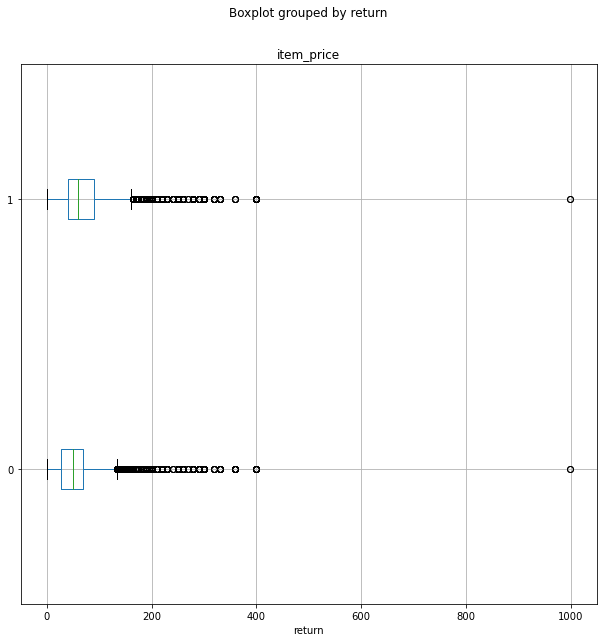

In [52]:
df.boxplot(column=['item_price'],by ='return' ,figsize=(10,10),vert=False)
plt.show()

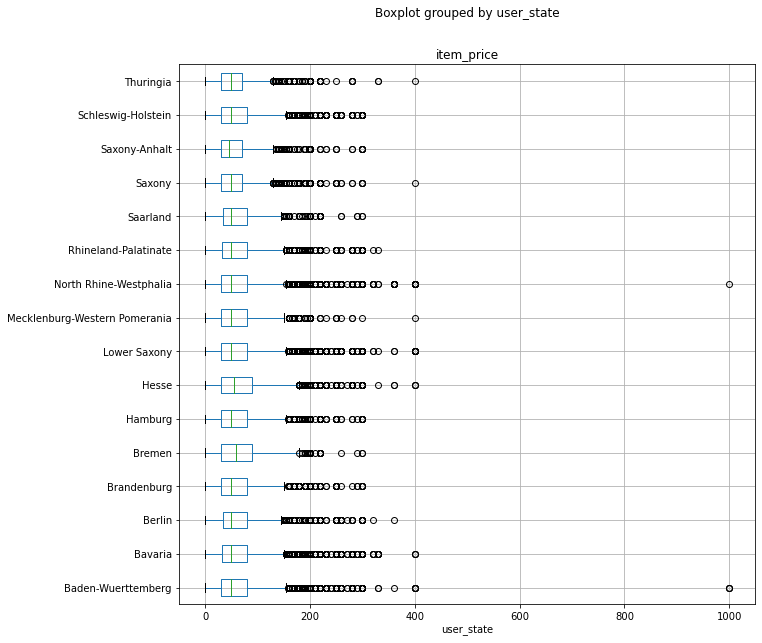

In [39]:
df.boxplot(column=['item_price'],by ='user_state' ,figsize=(10,10),vert=False)
plt.show()

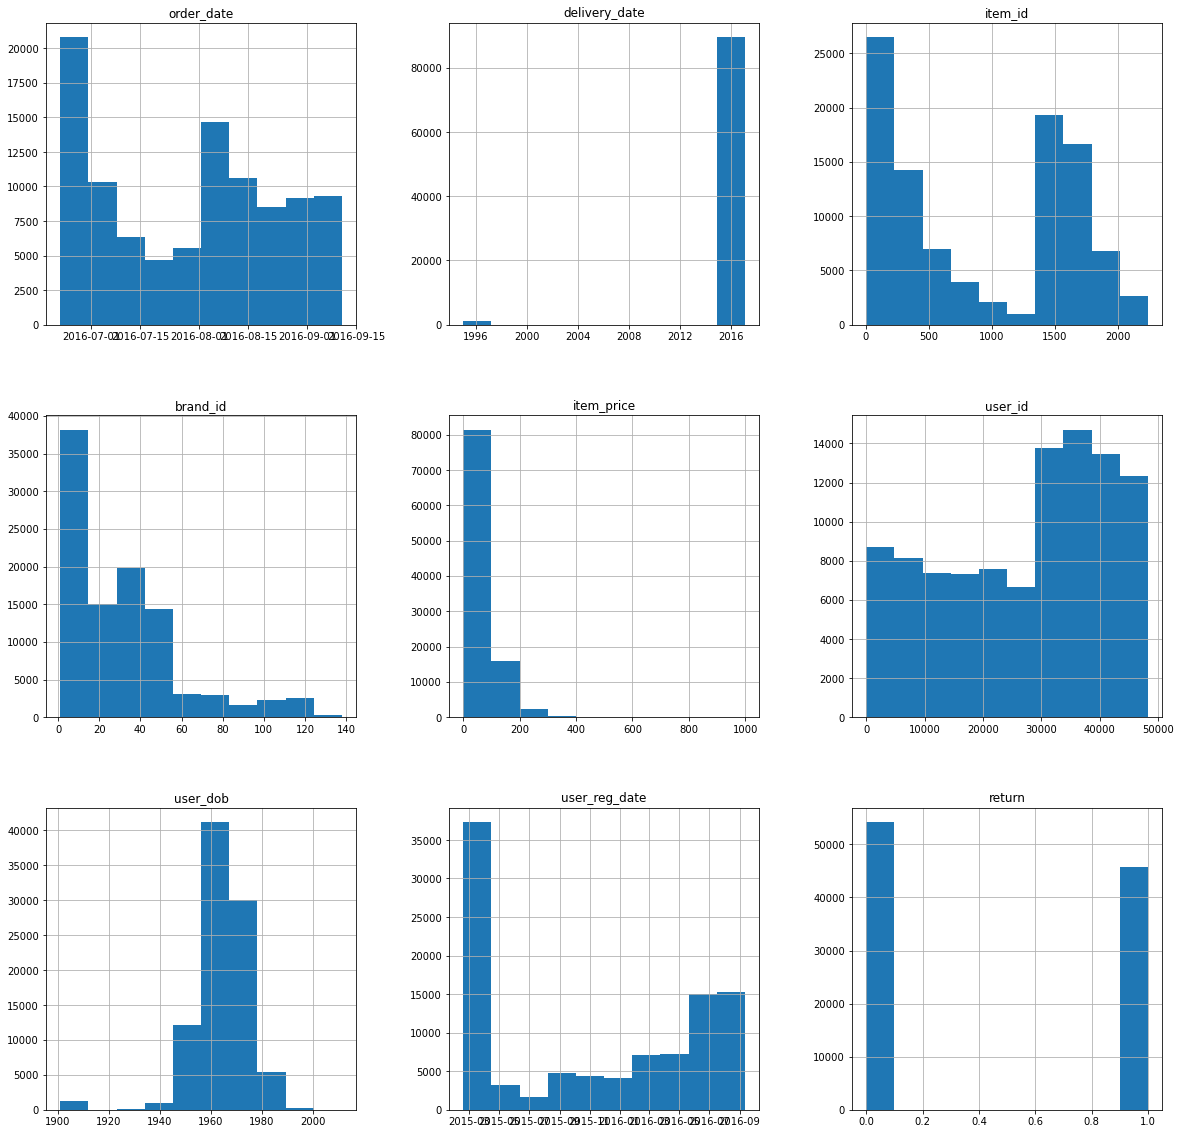

In [40]:
df.hist(figsize=(20,20))
plt.show()

Noisy datas are in 'delivery_date'

 ممکن است سن بیشتر از 100 داشته باشیم  user_dob در متغیر
1996: وجود دارد delivery_date  مقادیر نویزی در داده

<Figure size 1008x1440 with 0 Axes>

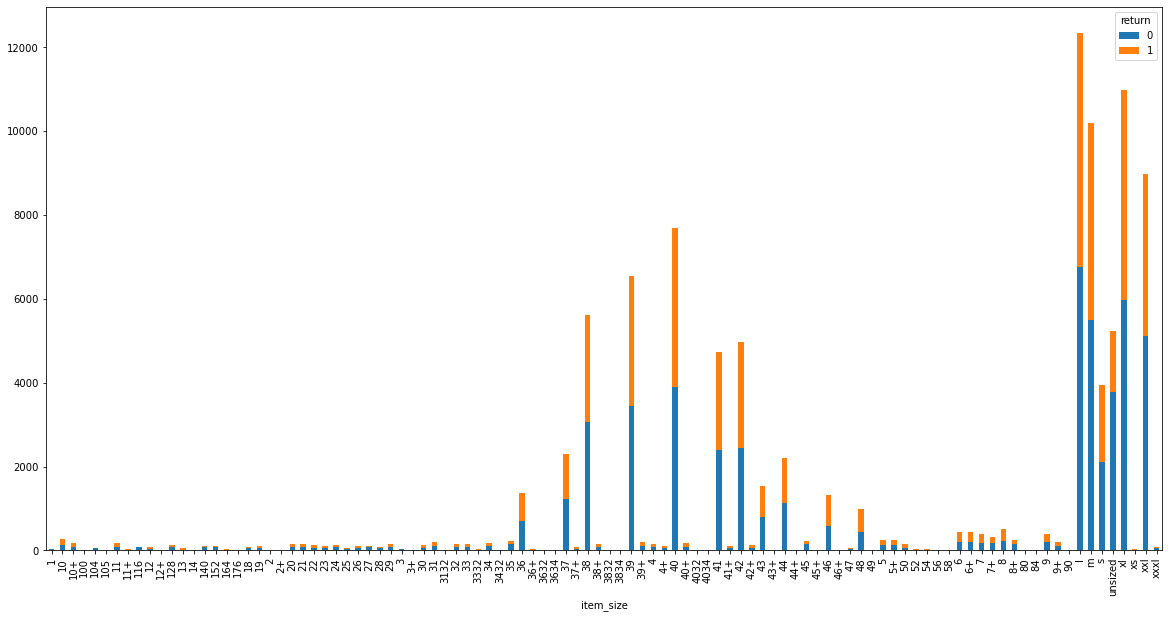

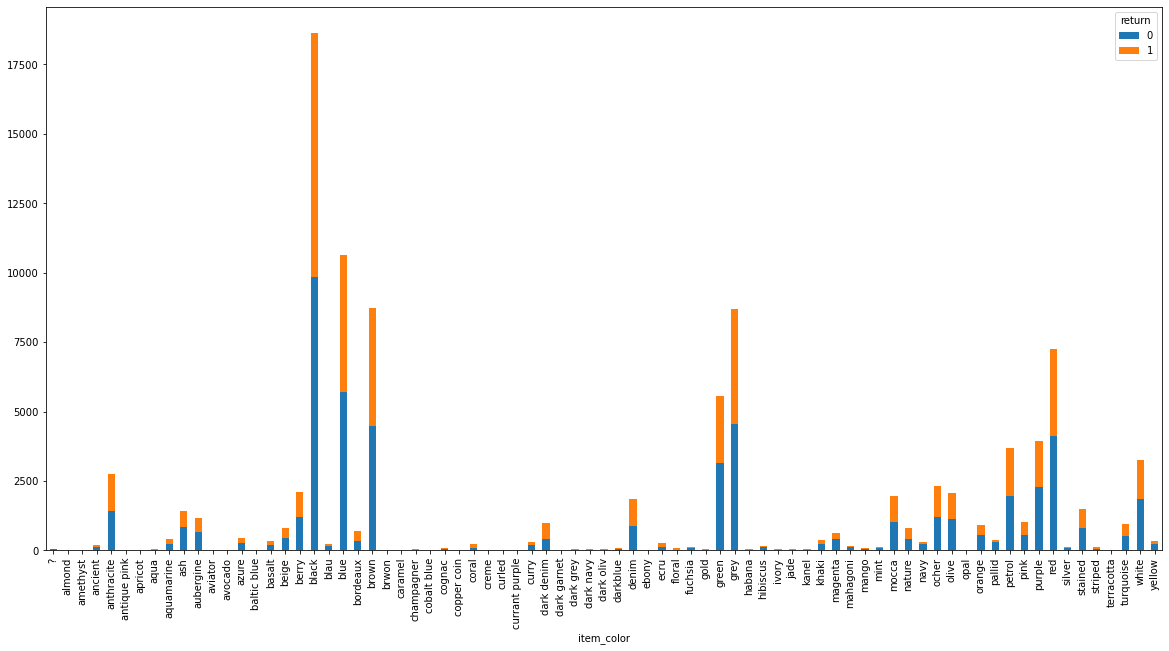

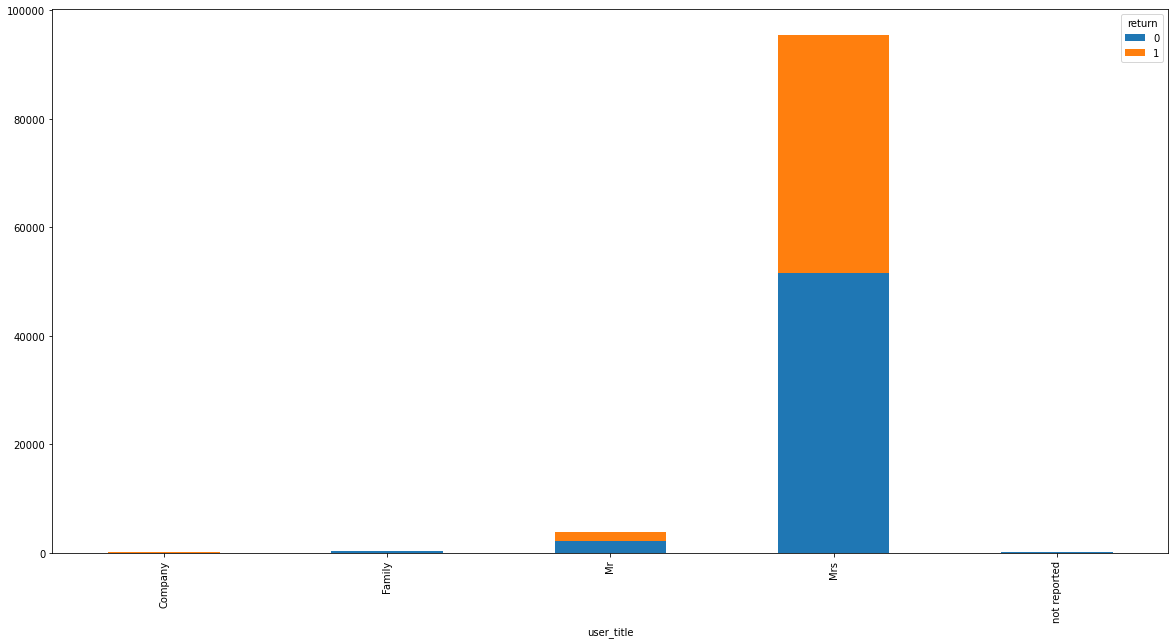

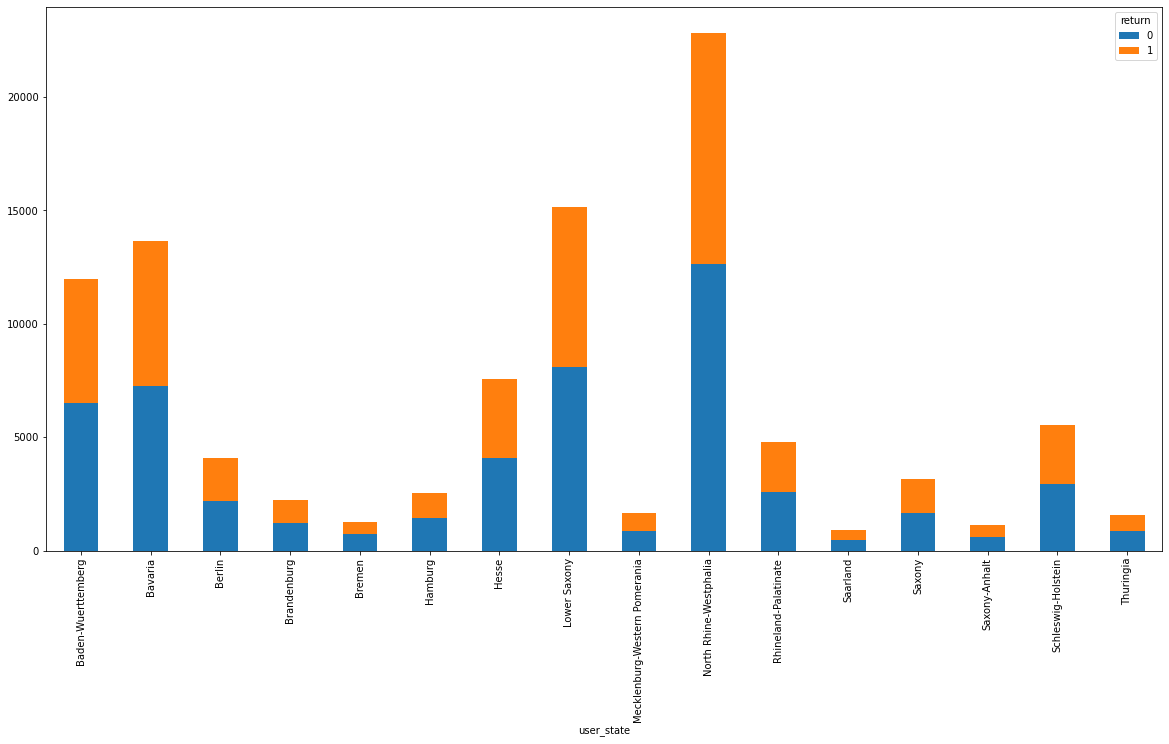

In [40]:
cat_columns2 = ['item_size','item_color','user_title','user_state']
plt.figure(figsize=(14,20)) 

for i, variable in enumerate(cat_columns2):  
                    pd.crosstab(df[variable],df['return']).plot.bar(figsize=(20,10),stacked=True)

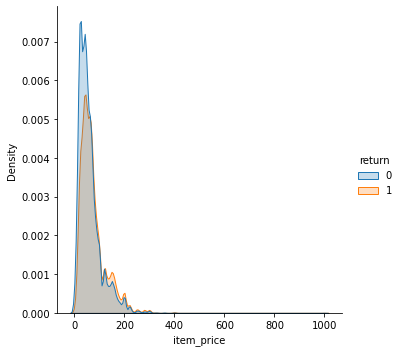

In [41]:
sns.displot(df,x='item_price',hue='return',kind='kde', fill="True")

قیمت تاثیر چندانی در تعداد مرجوعی ها نداشته است.
بر اساس نمودار های بالا رنگ و سایز می تواند تاثیر زیادی در مرجوعی سفارش ها داشته باشد.

#### Duplicated Rows

In [21]:
sum(df.duplicated())

1002

#### Remove Duplicated Rows 

In [22]:
df[df.duplicated(keep=False)]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return
order_item_id,,,,,,,,,,,,,,,
122,2016-06-23,2016-06-26,896,xl,grey,33,9.90,28379,Mrs,1966-10-09,North Rhine-Westphalia,2015-02-17,1,0.714286,0.387246
123,2016-06-23,2016-06-26,896,xl,grey,33,9.90,28379,Mrs,1966-10-09,North Rhine-Westphalia,2015-02-17,1,0.714286,0.387246
125,2016-06-23,2016-06-26,895,40,blue,39,39.95,30840,Mrs,1966-09-15,North Rhine-Westphalia,2016-02-21,0,0.000000,0.491391
126,2016-06-23,2016-06-26,895,40,blue,39,39.95,30840,Mrs,1966-09-15,North Rhine-Westphalia,2016-02-21,0,0.000000,0.491391
190,2016-06-23,NaT,896,l,grey,33,9.90,8398,Mrs,1958-04-21,Hesse,2016-02-29,0,0.700000,0.387246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99503,2016-09-10,2016-10-15,1532,xxl,black,37,26.90,257,Mrs,1972-09-08,Baden-Wuerttemberg,2015-08-10,0,0.000000,0.431086
99696,2016-09-10,2016-09-13,1122,38,black,96,159.90,29837,Mrs,NaT,North Rhine-Westphalia,2016-06-19,0,0.400000,0.811594
99697,2016-09-10,2016-09-13,1122,38,black,96,159.90,29837,Mrs,NaT,North Rhine-Westphalia,2016-06-19,0,0.400000,0.811594


In [23]:
#Drop duplicated rows
df = df[df.duplicated() == False]
df.shape

(98998, 15)

In [24]:
Lost_data = ((100000-98998)/100000)*100
Lost_data

1.002

#### Missing Values

In [25]:
df.isna().sum()

order_date                 0
delivery_date           9123
item_id                    0
item_size                  0
item_color                 0
brand_id                   0
item_price                 0
user_id                    0
user_title                 0
user_dob                8634
user_state                 0
user_reg_date              0
return                     0
Mean_of_user_return        0
mean_of_brand_return       0
dtype: int64

In [26]:
df[df.isnull().any(axis=1)]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return
order_item_id,,,,,,,,,,,,,,,
2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
12,2016-06-22,2016-06-27,212,l,grey,5,39.90,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.391546
13,2016-06-22,2016-06-27,378,l,black,5,59.90,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.391546
14,2016-06-22,2016-06-27,222,l,black,3,29.90,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.366582
42,2016-06-23,2016-06-26,394,40,grey,44,105.00,30827,Mrs,NaT,Hamburg,2016-02-09,1,1.000000,0.554257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,2016-09-11,2016-09-12,1530,l,black,56,79.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,0.584795
99988,2016-09-11,2016-09-12,1668,unsized,purple,32,79.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,1,0.428571,0.217636
99989,2016-09-11,2016-09-12,1509,unsized,petrol,32,39.90,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,0.217636


<AxesSubplot:ylabel='order_item_id'>

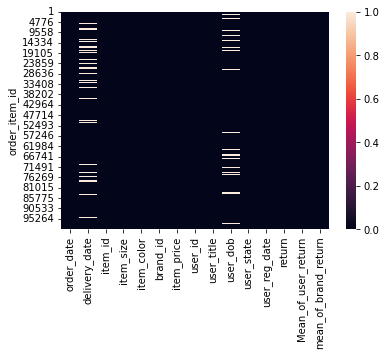

In [27]:
sns.heatmap(df.isnull())#NaN in 'user_dob' and 'delivery date'

In [28]:
df.loc[df['delivery_date'].isnull()]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return
order_item_id,,,,,,,,,,,,,,,
2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346
56,2016-06-23,NaT,5,l,white,5,69.90,30828,Mrs,1966-05-13,Lower Saxony,2016-01-21,0,0.904762,0.391546
64,2016-06-23,NaT,211,40,turquoise,1,69.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,0.625000,0.489440
65,2016-06-23,NaT,55,40,purple,1,89.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,0.625000,0.489440
66,2016-06-23,NaT,74,40,pink,24,69.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,0.625000,0.483376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953,2016-09-11,NaT,1508,42,dark denim,113,59.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,0.384615,0.669954
99954,2016-09-11,NaT,1498,42,green,6,59.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,0.384615,0.489918
99955,2016-09-11,NaT,1412,40,blue,54,119.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,0.384615,0.481106


In [29]:
df.loc[df['delivery_date'].isnull()]['return'].value_counts()#بدلیل عدم مرجوع شدن کالا از طرف کاربر و عدم وجود تاریخ رسیدن آن نشاندهنده آن است که احتمالا سفارش کنسل شده است

0    9123
Name: return, dtype: int64

In [30]:
#Create a new column>>True if delivery_date is Nan,False:if delivery_date isn't Nan
df['Canceled_Order'] = df['delivery_date'].isnull()
df['Canceled_Order'].value_counts()

False    89875
True      9123
Name: Canceled_Order, dtype: int64

In [31]:
df[df['delivery_date'] < '2016'][['order_date','delivery_date','return']]#delivery_date 1994??>>Noisy Data

,order_date,delivery_date,return
order_item_id,,,
287,2016-06-23,1994-12-31,0
288,2016-06-23,1994-12-31,0
289,2016-06-23,1994-12-31,0
789,2016-06-25,1994-12-31,1
790,2016-06-25,1994-12-31,1
...,...,...,...
99838,2016-09-11,1994-12-31,0
99839,2016-09-11,1994-12-31,0
99840,2016-09-11,1994-12-31,0


In [32]:
df[df['delivery_date'] < '2016']['return'].value_counts()

0    648
1    389
Name: return, dtype: int64

In [33]:
df['delivery_date'].dt.year.value_counts()

2016.0    88835
1994.0     1037
2017.0        3
Name: delivery_date, dtype: int64

In [34]:
df[df['delivery_date'] < '2016']['delivery_date'].value_counts()#تمامی مقادیر نویزی1994 دارای تاریخ تحویل یکسان هستند  

1994-12-31    1037
Name: delivery_date, dtype: int64

In [35]:
df.loc[df['user_dob'].isnull()]# عدم ثبت تاریخ تولد توسط کاربران

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return,Canceled_Order
order_item_id,,,,,,,,,,,,,,,,
12,2016-06-22,2016-06-27,212,l,grey,5,39.9,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.391546,False
13,2016-06-22,2016-06-27,378,l,black,5,59.9,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.391546,False
14,2016-06-22,2016-06-27,222,l,black,3,29.9,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.366582,False
42,2016-06-23,2016-06-26,394,40,grey,44,105.0,30827,Mrs,NaT,Hamburg,2016-02-09,1,1.000000,0.554257,False
43,2016-06-23,2016-06-26,394,40,black,44,90.0,30827,Mrs,NaT,Hamburg,2016-02-09,1,1.000000,0.554257,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,2016-09-11,2016-09-12,1530,l,black,56,79.9,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,0.584795,False
99988,2016-09-11,2016-09-12,1668,unsized,purple,32,79.9,12130,Mrs,NaT,Lower Saxony,2016-01-20,1,0.428571,0.217636,False
99989,2016-09-11,2016-09-12,1509,unsized,petrol,32,39.9,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,0.217636,False


In [27]:
df.loc[df['user_dob'].isnull()]['return'].value_counts()

0    4698
1    3936
Name: return, dtype: int64

#### Dealing with NaN s

In [50]:
df['delivery_date']

order_item_id
1        2016-06-27
2               NaT
3        2016-06-27
4        2016-06-27
5        2016-06-27
            ...    
99995    2016-09-13
99996    2016-09-12
99997    2016-09-12
99998    1994-12-31
100000   2016-10-08
Name: delivery_date, Length: 98998, dtype: datetime64[ns]

In [36]:
#Replace noisy input data in 'delivey_date' with NaN
df['delivery_date'] = df['delivery_date'].replace('1994-12-31', np.nan)

In [37]:
df.isna().sum()

order_date                  0
delivery_date           10160
item_id                     0
item_size                   0
item_color                  0
brand_id                    0
item_price                  0
user_id                     0
user_title                  0
user_dob                 8634
user_state                  0
user_reg_date               0
return                      0
Mean_of_user_return         0
mean_of_brand_return        0
Canceled_Order              0
dtype: int64

In [38]:
#Fill NaN's in delivery_date
#Replacing with next value - Backward fill:Backward fill uses the next value to fill the missing value
df['delivery_date'].interpolate(method="backfill",inplace = True)

In [39]:
df.isna().sum()

order_date                 0
delivery_date              0
item_id                    0
item_size                  0
item_color                 0
brand_id                   0
item_price                 0
user_id                    0
user_title                 0
user_dob                8634
user_state                 0
user_reg_date              0
return                     0
Mean_of_user_return        0
mean_of_brand_return       0
Canceled_Order             0
dtype: int64

In [39]:
df[['order_date','delivery_date']]

,order_date,delivery_date
order_item_id,,
1,2016-06-22,2016-06-27
2,2016-06-22,2016-06-27
3,2016-06-22,2016-06-27
4,2016-06-22,2016-06-27
5,2016-06-22,2016-06-27
...,...,...
99995,2016-09-11,2016-09-13
99996,2016-09-11,2016-09-12
99997,2016-09-11,2016-09-12


In [40]:
df['delivery_date'].dt.year.value_counts()

2016    98995
2017        3
Name: delivery_date, dtype: int64

In [40]:
df['DeliveryInterval'] = (df['delivery_date'] - df['order_date']).dt.days
df

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return,Canceled_Order,DeliveryInterval
order_item_id,,,,,,,,,,,,,,,,,
1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346,False,5
2,2016-06-22,2016-06-27,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0.000000,0.355346,True,5
3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,0.588235,0.538950,False,5
4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,0.588235,0.538950,False,5
5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,0.588235,0.366582,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2016-09-11,2016-09-13,1600,xl,green,75,219.90,9580,Mrs,1958-04-24,Baden-Wuerttemberg,2015-02-17,0,0.250000,0.529963,False,2
99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,0.500000,0.498771,False,1
99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,0.500000,0.498771,False,1


In [41]:
df['DeliveryInterval'].describe()

count    98998.000000
mean         7.347199
std         13.357332
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        173.000000
Name: DeliveryInterval, dtype: float64

In [42]:
df['Age'] =(df['order_date'] - df['user_dob']).dt.days//365
df['Age']

order_item_id
1         47.0
2         47.0
3         46.0
4         46.0
5         46.0
          ... 
99995     58.0
99996     57.0
99997     57.0
99998     31.0
100000    42.0
Name: Age, Length: 98998, dtype: float64

In [43]:
df.Age.describe()

count    90364.000000
mean        51.863142
std         11.296959
min          4.000000
25%         46.000000
50%         51.000000
75%         57.000000
max        115.000000
Name: Age, dtype: float64

In [80]:
df.loc[df['Age'].isnull()]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Mean_of_user_return,mean_of_brand_return,Canceled_Order,Interval,Age
order_item_id,,,,,,,,,,,,,,,,,,
12,2016-06-22,2016-06-27,212,l,grey,5,39.9,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.391546,False,5,NaN
13,2016-06-22,2016-06-27,378,l,black,5,59.9,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.391546,False,5,NaN
14,2016-06-22,2016-06-27,222,l,black,3,29.9,30824,Mrs,NaT,Lower Saxony,2016-06-23,0,0.000000,0.366582,False,5,NaN
42,2016-06-23,2016-06-26,394,40,grey,44,105.0,30827,Mrs,NaT,Hamburg,2016-02-09,1,1.000000,0.554257,False,3,NaN
43,2016-06-23,2016-06-26,394,40,black,44,90.0,30827,Mrs,NaT,Hamburg,2016-02-09,1,1.000000,0.554257,False,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,2016-09-11,2016-09-12,1530,l,black,56,79.9,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,0.584795,False,1,NaN
99988,2016-09-11,2016-09-12,1668,unsized,purple,32,79.9,12130,Mrs,NaT,Lower Saxony,2016-01-20,1,0.428571,0.217636,False,1,NaN
99989,2016-09-11,2016-09-12,1509,unsized,petrol,32,39.9,12130,Mrs,NaT,Lower Saxony,2016-01-20,0,0.428571,0.217636,False,1,NaN


In [44]:
df.nunique()

order_date                 82
delivery_date             122
item_id                  1943
item_size                 102
item_color                 77
brand_id                  135
item_price                252
user_id                 19205
user_title                  5
user_dob                 9247
user_state                 16
user_reg_date             573
return                      2
Mean_of_user_return       297
mean_of_brand_return      115
Canceled_Order              2
DeliveryInterval          124
Age                        82
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98998 entries, 1 to 100000
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_date            98998 non-null  datetime64[ns]
 1   delivery_date         98998 non-null  datetime64[ns]
 2   item_id               98998 non-null  int64         
 3   item_size             98998 non-null  category      
 4   item_color            98998 non-null  category      
 5   brand_id              98998 non-null  int64         
 6   item_price            98998 non-null  float64       
 7   user_id               98998 non-null  int64         
 8   user_title            98998 non-null  category      
 9   user_dob              90364 non-null  datetime64[ns]
 10  user_state            98998 non-null  category      
 11  user_reg_date         98998 non-null  datetime64[ns]
 12  return                98998 non-null  int64         
 13  Mean_of_user_re

In [46]:
df.drop(df[df.item_color == "?"].index, inplace=True)

In [47]:
df.drop(df.columns[[0, 1,2,5,7,9,11]], axis = 1, inplace = True)#Drop unnecessary colmuns

Text(0.5, 1.0, 'Correlation Heatmap')

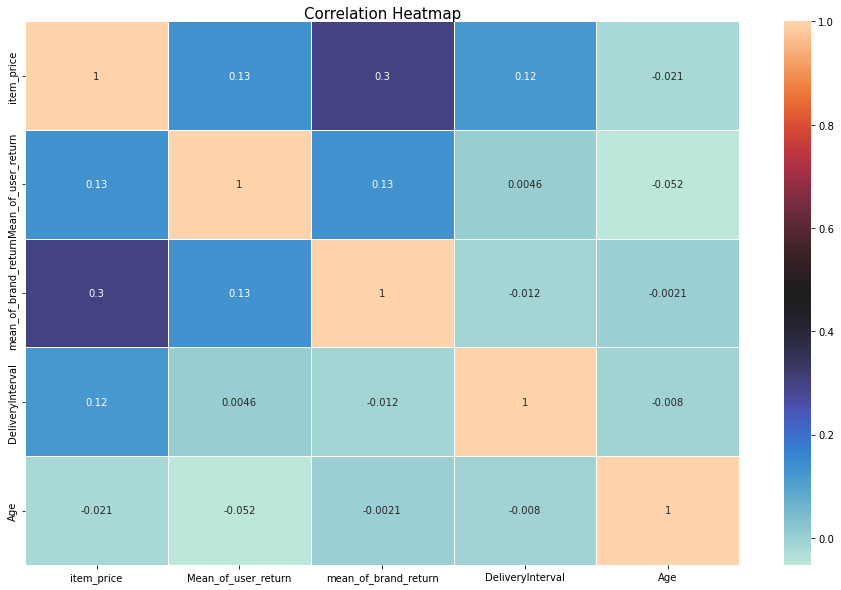

In [48]:
#Corrolation Cheking between numeric variables
plt.figure(figsize=(16,10))
Numeric = ['item_price', 'Mean_of_user_return', 'mean_of_brand_return','DeliveryInterval','Age']
HeatMap=sns.heatmap(df[Numeric].corr(),annot=True,cmap=sns.color_palette("icefire", as_cmap=True),linewidths=0.5)
HeatMap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=2)

In [49]:
df.corr(method ='pearson')#تقریبا تمامی متغیرهای باقی مانده قادر به توصیف متغیر وابسته هستند

,item_price,return,Mean_of_user_return,mean_of_brand_return,Canceled_Order,DeliveryInterval,Age
item_price,1.000000,0.138112,0.133168,0.297942,-0.040510,0.122614,-0.020804
return,0.138112,1.000000,0.589220,0.184433,-0.293828,-0.008011,-0.030298
Mean_of_user_return,0.133168,0.589220,1.000000,0.134279,-0.164516,0.004599,-0.052222
mean_of_brand_return,0.297942,0.184433,0.134279,1.000000,-0.058488,-0.011799,-0.002073
Canceled_Order,-0.040510,-0.293828,-0.164516,-0.058488,1.000000,-0.014381,-0.008386
DeliveryInterval,0.122614,-0.008011,0.004599,-0.011799,-0.014381,1.000000,-0.007997
Age,-0.020804,-0.030298,-0.052222,-0.002073,-0.008386,-0.007997,1.000000


In [50]:
df['return'] = df['return'].astype('bool')

#### Using KNN algorithm for filling NaN

KNN Imputer does not recognize text data values,we should modify text data: reduce unique values of categorical values,convert categorical datas to numeric ones for getting dummis,min_max scaling

In [51]:
df.dtypes

item_size               category
item_color              category
item_price               float64
user_title              category
user_state              category
return                      bool
Mean_of_user_return      float64
mean_of_brand_return     float64
Canceled_Order              bool
DeliveryInterval           int64
Age                      float64
dtype: object

Handeling High cardinality of categorical variables for modeling and filling NaNs

Text(0.5, 1.0, 'Cardinality')

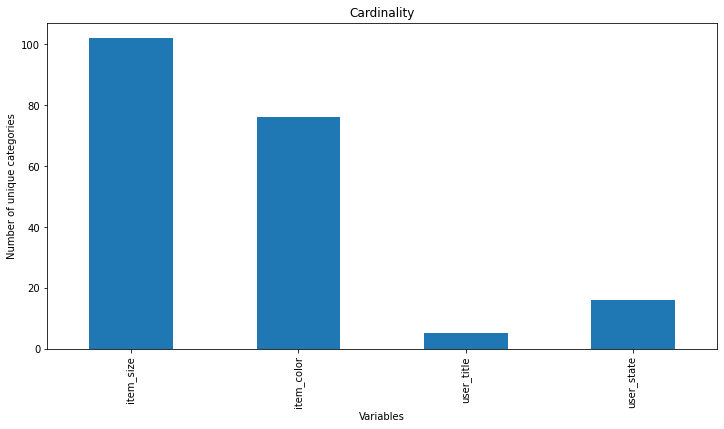

In [52]:
cat_variables = df[['item_size', 'item_color','user_title','user_state']]
cat_variables.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [53]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
  threshold_value=int(threshold*len(column))
  categories_list=[]
  s=0
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    s+=dict(counts)[i]
    categories_list.append(i)
    if s>=threshold_value:
      break
  
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    
  if(return_categories_list):
    return new_column,categories_list
  else:
    return new_column

transformed_size,new_category_list=cumulatively_categorise(cat_variables['item_size'],return_categories_list=True)
transformed_color,new_category_list=cumulatively_categorise(cat_variables['item_color'],return_categories_list=True)

In [54]:
transformed_color.describe()

count     98937
unique       12
top       Other
freq      24267
Name: item_color, dtype: object

In [55]:
df['item_size'] = transformed_size
df['item_color'] = transformed_color

In [56]:
df['item_size'] = df['item_size'].astype('category')
df['item_color'] = df['item_color'].astype('category')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98937 entries, 1 to 100000
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   item_size             98937 non-null  category
 1   item_color            98937 non-null  category
 2   item_price            98937 non-null  float64 
 3   user_title            98937 non-null  category
 4   user_state            98937 non-null  category
 5   return                98937 non-null  bool    
 6   Mean_of_user_return   98937 non-null  float64 
 7   mean_of_brand_return  98937 non-null  float64 
 8   Canceled_Order        98937 non-null  bool    
 9   DeliveryInterval      98937 non-null  int64   
 10  Age                   90306 non-null  float64 
dtypes: bool(2), category(4), float64(4), int64(1)
memory usage: 5.1 MB


In [1]:
df = pd.get_dummies(df)
df

NameError: name 'pd' is not defined

In [59]:
scaler = MinMaxScaler()#min_max scaling
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,item_price,return,Mean_of_user_return,mean_of_brand_return,Canceled_Order,DeliveryInterval,Age,item_size_38,item_size_39,item_size_40,...,user_state_Hesse,user_state_Lower Saxony,user_state_Mecklenburg-Western Pomerania,user_state_North Rhine-Westphalia,user_state_Rhineland-Palatinate,user_state_Saarland,user_state_Saxony,user_state_Saxony-Anhalt,user_state_Schleswig-Holstein,user_state_Thuringia
0,0.049950,0.0,0.000000,0.355346,0.0,0.028902,0.387387,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.019970,0.0,0.000000,0.355346,1.0,0.028902,0.387387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.079980,1.0,0.588235,0.538950,0.0,0.028902,0.378378,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.0,0.588235,0.538950,0.0,0.028902,0.378378,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.014915,1.0,0.588235,0.366582,0.0,0.028902,0.378378,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#Fill NaN with Knn Imputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [61]:
df.isna().sum()

item_price                                  0
return                                      0
Mean_of_user_return                         0
mean_of_brand_return                        0
Canceled_Order                              0
DeliveryInterval                            0
Age                                         0
item_size_38                                0
item_size_39                                0
item_size_40                                0
item_size_41                                0
item_size_42                                0
item_size_Other                             0
item_size_l                                 0
item_size_m                                 0
item_size_unsized                           0
item_size_xl                                0
item_size_xxl                               0
item_color_Other                            0
item_color_anthracite                       0
item_color_black                            0
item_color_blue                   

#### Split Dataset into test and train

In [62]:
X = df.drop(axis=1, columns=['return'])
y = df['return']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [64]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Modeling

##### برای پیش بینی مرجوع شدن یک سفارش با توجه به باینری بودن متغیر پاسخ از الگوریتم های یادگیری ماشین نظارت شده نظیر رگرسیون لاجستیک/ درخت تصمیم /نایو بیز و نزدیکترین همسایه می توان بهره برد 

In [65]:
Knn = KNeighborsClassifier(n_neighbors=10)#کاربرد الگوریتم knn:سهولت تفسیر نتایج و زمان محاسبه پایین در رکوردهای زیاد
Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

الگوریتم نزدیکترین همسایه برای تعداد رکوردهای زیاد زمان محاسبه کمی دارد و دقت آن 72 درصد بدست آمده است  

In [66]:
y_pred = Knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7200828785122296


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75     10707
         1.0       0.71      0.66      0.68      9081

    accuracy                           0.72     19788
   macro avg       0.72      0.72      0.72     19788
weighted avg       0.72      0.72      0.72     19788



In [69]:
Tree = DecisionTreeClassifier(max_depth=5)#زمان اجرا خوب در داده های زیاد و سهولت تفسیر مدل
Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

درخت تصمیم نسبت به مقادیر داده ها حساسیت کمی دارد و می توان با استفاده از مصورسازی به راحتی آن را تفسیر نمود که حاصل از آن 77درصد بدست آمده است

In [70]:
y_pred = Tree.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7745098039215687


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     10707
         1.0       0.75      0.76      0.75      9081

    accuracy                           0.77     19788
   macro avg       0.77      0.77      0.77     19788
weighted avg       0.77      0.77      0.77     19788



In [72]:
LR = LogisticRegression(random_state=0).fit(X_train, y_train)#با توجه به باینری بودن متغیر پاسخ الگوریتم رگرسیون لاجستیک در پیش بینی کمک کننده است و رابطه ی هر متغیر مستقل را در توضیح متغیر پاسخ مشخص می کند 

الگوریتم لاجستیک رگرسیون نوعی از رگرسیون است که در مسایل طبقه بندی و متغیر پاسخ کیفی قابل استفاده است

In [75]:
y_pred = LR.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7776430159692743


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79     10707
         1.0       0.75      0.78      0.76      9081

    accuracy                           0.78     19788
   macro avg       0.78      0.78      0.78     19788
weighted avg       0.78      0.78      0.78     19788



In [77]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[8339 2368]
 [2032 7049]]


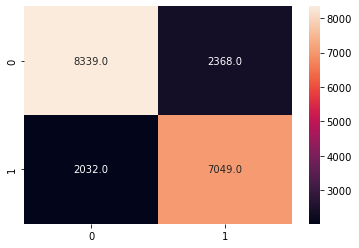

In [73]:
sns.heatmap(cf_matrix, annot=True,  fmt=".1f")
plt.show()

In [81]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

الگوریتم نایو بیز با آنکه سریع اجرا می شود و به راحتی قابل تفسیر است اما در اینجا دقت بسیار کمی دارد(تخصیص هر کلاس به صورت 50-50)

In [82]:
y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5410855063674954


In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70     10707
         1.0       0.00      0.00      0.00      9081

    accuracy                           0.54     19788
   macro avg       0.27      0.50      0.35     19788
weighted avg       0.29      0.54      0.38     19788

